In [1]:
# Imports
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image Data Preprocessing

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the `ImageDataGenerator` class.



***
In the previous module, we have learnt to load data using `load_image`, `image_dataset_from_directory`, and `flow_from_directory` methods. Let's define the paths of images, as we did in the previous module, for each directory as shown in the below cell. 

***

In [3]:
# The path of the main directory
current_dir = '/content/drive/MyDrive/BUITEMS/DeepLearning/Datasets/Cat_Dog_data/'

# The path of the train directory
train_dir = os.path.join(current_dir, 'train')

# The path of the test directory
test_dir = os.path.join(current_dir, 'test')

# The path of the dog directory inside train sub-directory
train_dir_dog = os.path.join(train_dir, 'dog')

# The path of the cat directory inside train sub-directory
train_dir_cat = os.path.join(train_dir, 'cat')

# The path of the dog directory inside test sub-directory
test_dir_dog = os.path.join(test_dir, 'dog')

# The path of the cat directory inside test sub-directory
test_dir_cat = os.path.join(test_dir, 'cat')

# creating a list (train_cat_image_names) which contains the names of cats' pictures in the train directory
train_cat_image_names = os.listdir(train_dir_cat)

# creating a list (train_dog_image_names) which contains the names of dogs' pictures in the train directory
train_dog_image_names = os.listdir(train_dir_dog)

In [4]:
print('There are {} dogs and {} cats in the training dataset.'.
      format(len(os.listdir(train_dir_dog)), len(os.listdir(train_dir_cat))))

print('There are {} dogs and {} cats in the testing dataset.'.
      format(len(os.listdir(test_dir_dog)), len(os.listdir(test_dir_cat))))

There are 274 dogs and 274 cats in the training dataset.
There are 88 dogs and 88 cats in the testing dataset.


***
Let's read a single image and then we will apply augmentation techniques on it using `ImageDataGenerator` method.
***

In [5]:
# Reading a single image
image = load_img(os.path.join(train_dir_cat, train_cat_image_names[0]))

# Adding the dimension for batch
image = np.expand_dims(image, 0)

***
## Horizontal and Vertical Shift Augmentation


A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same.

This means that some of the pixels will be clipped off the image and there will be a region of the image where new pixel values will have to be specified.

The `width_shift_range` and `height_shift_range` arguments to the `ImageDataGenerator` constructor control the amount of horizontal and vertical shift respectively.

These arguments can specify a floating point value that indicates the percentage (between 0 and 1) of the width or height of the image to shift. Alternately, a number of pixels can be specified to shift the image.

Specifically, a value in the range between no shift and the percentage or pixel value will be sampled for each image and the shift performed, e.g. [0, value]. Alternately, you can specify a tuple or array of the min and max range from which the shift will be sampled; for example: [-100, 100] or [-0.5, 0.5].

The example below demonstrates a horizontal shift with the width_shift_range argument between [-100,100] pixels and generates a plot of generated images to demonstrate the effect.

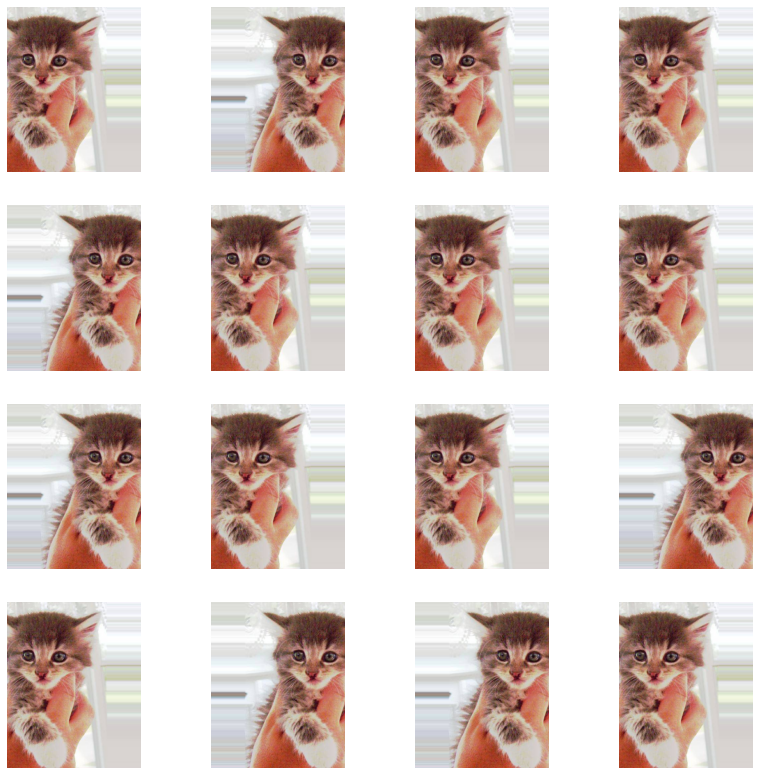

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=[-100,100])
image = load_img(os.path.join(train_dir_cat, train_cat_image_names[0]))
image = np.expand_dims(image, 0)
image = train_datagen.flow(image, batch_size=1)
plt.figure(figsize=(14,14))
for i in range(16):
 plt.subplot(4,4,i+1);
 plt.imshow(image.next()[0])
 plt.axis('off');

Below is the same example updated to perform vertical shifts of the image via the height_shift_range argument, in this case specifying the percentage of the image to shift as 0.5 the height of the image.

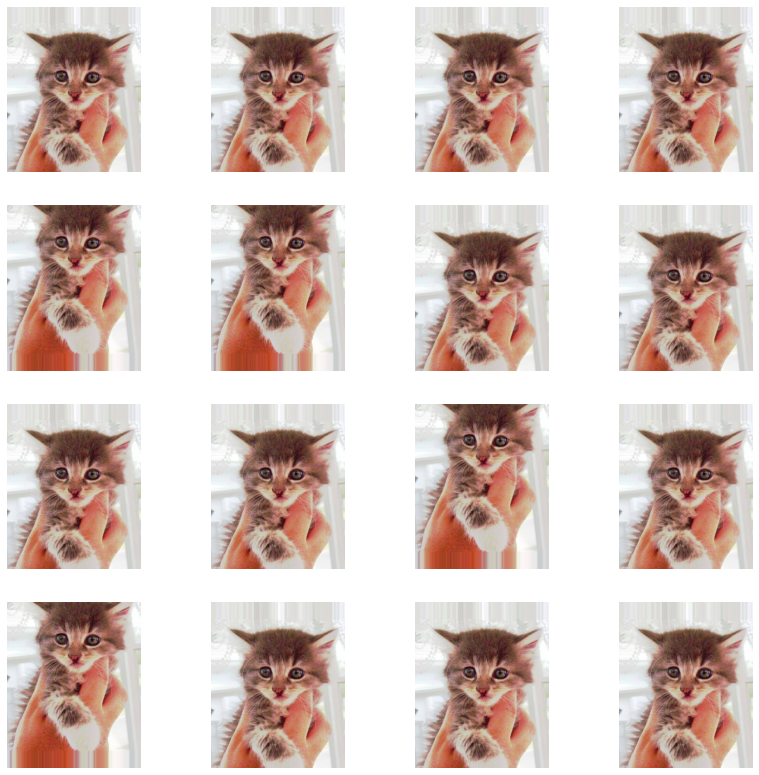

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, height_shift_range=[-50,50])
image = load_img(os.path.join(train_dir_cat, train_cat_image_names[0]))
image = np.expand_dims(image, 0)
image = train_datagen.flow(image, batch_size=1)
plt.figure(figsize=(14,14))
for i in range(16):
 plt.subplot(4,4,i+1);
 plt.imshow(image.next()[0])
 plt.axis('off');

***
## Horizontal and Vertical Flip Augmentation


An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.

The flip augmentation is specified by a boolean `horizontal_flip` or `vertical_flip` argument to the `ImageDataGenerator` class constructor. 

The example below demonstrates augmenting the chosen photograph with horizontal flips via the `horizontal_flip` argument.

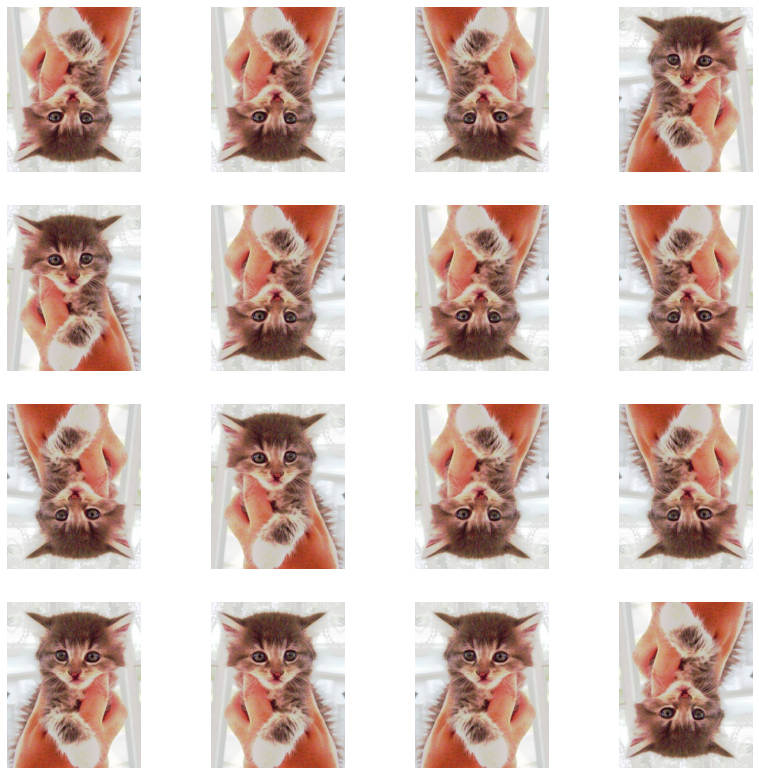

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,
                                   vertical_flip = True)
image = load_img(os.path.join(train_dir_cat, train_cat_image_names[0]))
image = np.expand_dims(image, 0)
image = train_datagen.flow(image, batch_size=1)
plt.figure(figsize=(14,14))
for i in range(16):
 plt.subplot(4,4,i+1);
 plt.imshow(image.next()[0])
 plt.axis('off');


***
## Random Rotation Augmentation

A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.

The rotation will likely rotate pixels out of the image frame and leave areas of the frame with no pixel data that must be filled in.

The example below demonstrates random rotations via the rotation_range argument, with rotations to the image between 0 and 90 degrees.

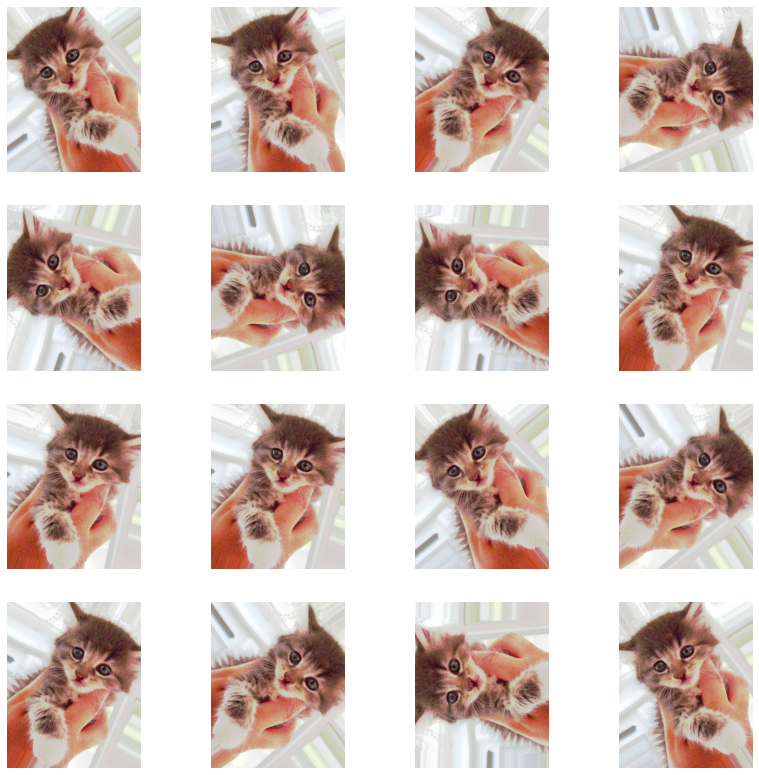

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=90)
image = load_img(os.path.join(train_dir_cat, train_cat_image_names[0]))
image = np.expand_dims(image, 0)
image = train_datagen.flow(image, batch_size=1)
plt.figure(figsize=(14,14))
for i in range(16):
 plt.subplot(4,4,i+1);
 plt.imshow(image.next()[0])
 plt.axis('off');


***
## Random Brightness Augmentation

The brightness of the image can be augmented by either randomly darkening images, brightening images, or both.

The intent is to allow a model to generalize across images trained on different lighting levels.

This can be achieved by specifying the `brightness_range` argument to the `ImageDataGenerator()` constructor that specifies min and max range as a float representing a percentage for selecting a brightening amount.

Values less than 1.0 darken the image, e.g. $[0.5, 1.0]$, whereas values larger than 1.0 brighten the image, e.g. $[1.0, 1.5]$, where 1.0 has no effect on brightness.

The example below demonstrates a brightness image augmentation, allowing the generator to randomly darken the image between 1.0 (no change) and 0.1 or 10%.

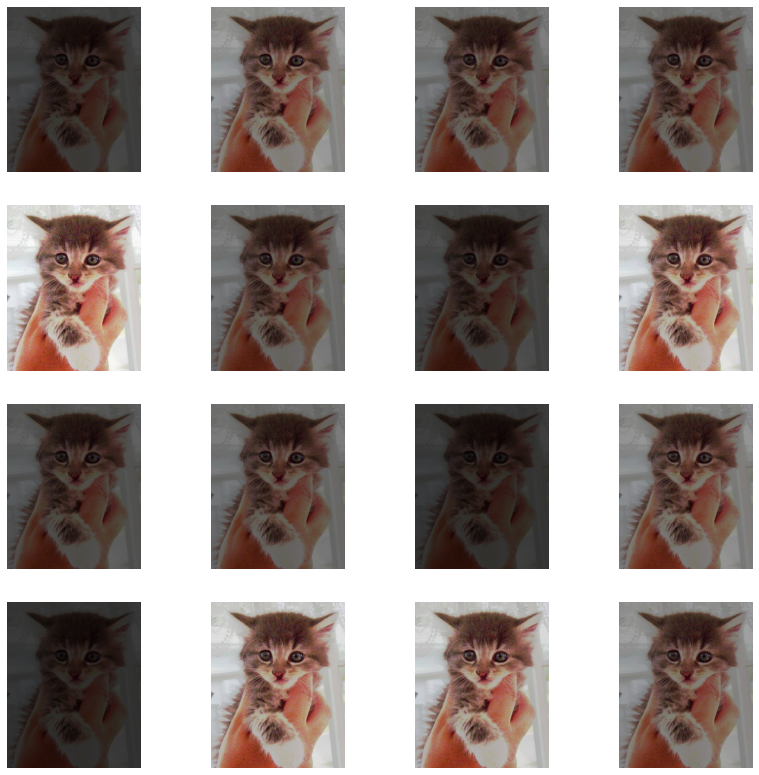

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255, brightness_range=[0.1, 1])
image = load_img(os.path.join(train_dir_cat, train_cat_image_names[0]))
image = np.expand_dims(image, 0)
image = train_datagen.flow(image, batch_size=1)
plt.figure(figsize=(14,14))
for i in range(16):
 plt.subplot(4,4,i+1);
 plt.imshow(image.next()[0])
 plt.axis('off');

***
##  Random Shear Augmentation

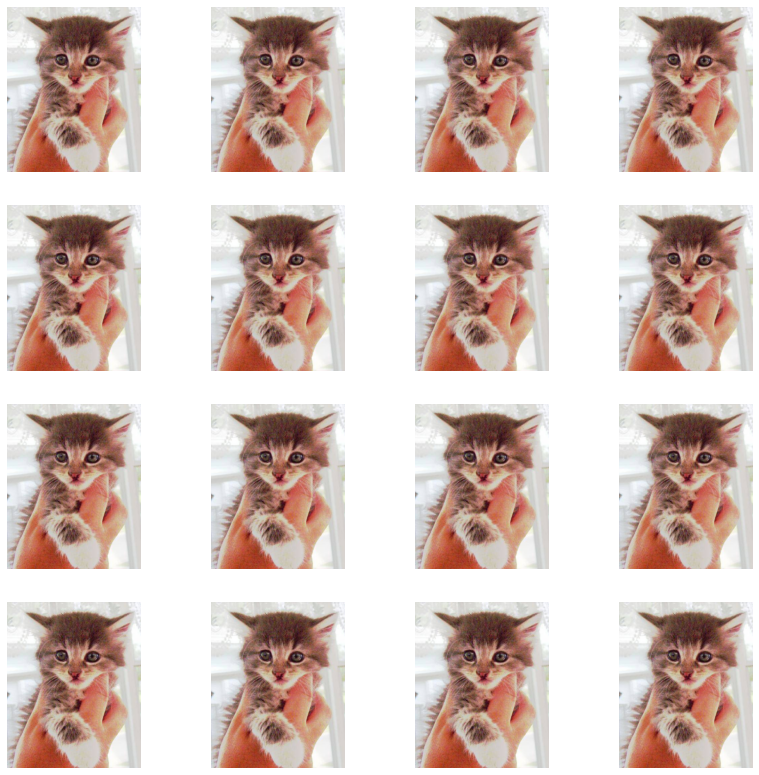

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.9)
image = load_img(os.path.join(train_dir_cat, train_cat_image_names[0]))
image = np.expand_dims(image, 0)
image = train_datagen.flow(image, batch_size=1)
plt.figure(figsize=(14,14))
for i in range(16):
 plt.subplot(4,4,i+1);
 plt.imshow(image.next()[0])
 plt.axis('off');

***
## Random Zoom Augmentation

A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.

Image zooming can be configured by the `zoom_range` argument to the `ImageDataGenerator` constructor. You can specify the percentage of the zoom as a single float or a range as an array or tuple.

If a float is specified, then the range for the zoom will be $[1-value, 1+value]$. For example, if you specify 0.3, then the range will be $[0.7, 1.3]$, or between 70% (zoom in) and 130% (zoom out).

The zoom amount is uniformly randomly sampled from the zoom region for each dimension (width, height) separately.

The zoom may not feel intuitive. Note that zoom values less than 1.0 will zoom the image in, e.g. $[0.5,0.5]$ makes the object in the image 50% larger or closer, and values larger than 1.0 will zoom the image out by 50%, e.g. $[1.5, 1.5]$ makes the object in the image smaller or further away. A zoom of $[1.0,1.0]$ has no effect.

The example below demonstrates zooming the image in, e.g. making the object in the photograph larger.

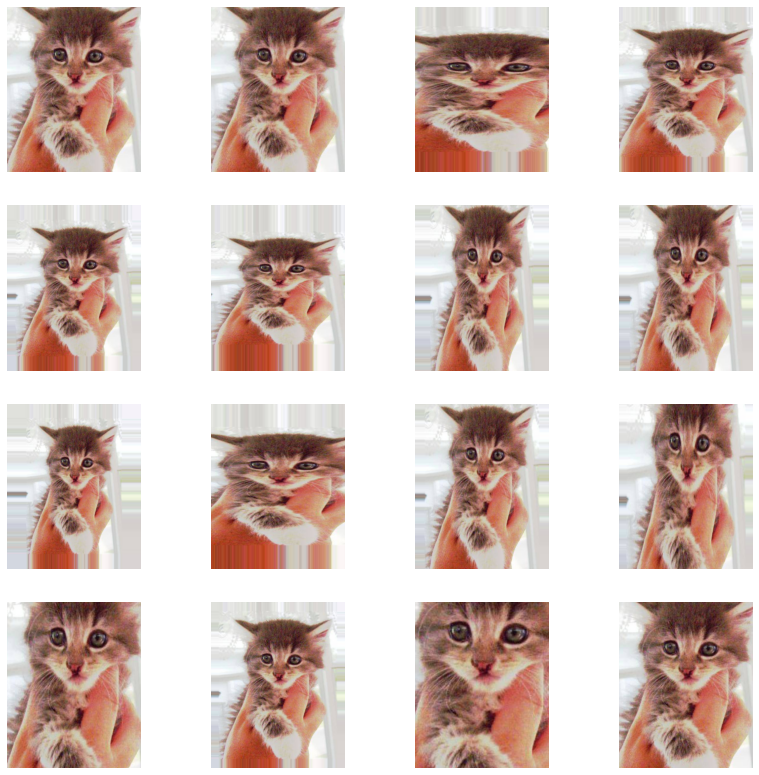

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=[0.5,1.5])
image = load_img(os.path.join(train_dir_cat, train_cat_image_names[0]))
image = np.expand_dims(image, 0)
image = train_datagen.flow(image, batch_size=1)
plt.figure(figsize=(14,14))
for i in range(16):
 plt.subplot(4,4,i+1);
 plt.imshow(image.next()[0])
 plt.axis('off');

## Loading Image Dataset Using `flow_from_directory` Method

In the previous module, we saw that our model was giving us more than $98\%$ accuracy for taining data and $68\%$ accuracy for testing data. Let's augment our training dataset and see if there is any improvement in the testing data.

In [13]:
train_datagenerator = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=[-100,100],
    height_shift_range=[-100,100],
    brightness_range=[0.5, 0.9],
    shear_range=0.9,
    zoom_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255
    )
test_datagenerator = ImageDataGenerator(rescale = 1./255)

***
#### Retrieve an iterator by calling the `flow_from_directory()` function

In [14]:
train_it = train_datagenerator.flow_from_directory(
    directory = train_dir,
    target_size = (256, 256),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)

test_it = test_datagenerator.flow_from_directory(
    directory = test_dir,
    target_size = (256, 256),
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True
)

Found 548 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


***
#### Use the iterator in the training or evaluation of a model



***
Let's build a model and train it.

In [15]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',
                 input_shape = (256, 256, 3), data_format = 'channels_last',
                 activation = 'relu'))

model.add(MaxPooling2D(3))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation = 'relu'))

model.add(Flatten())
model.add(Dense(units=150, activation='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 231200)            0         
_________________________________________________________________
dense (Dense)                (None, 150)               34680150  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 34,700,557
Trainable params: 34,700,557
Non-trainable params: 0
____________________________________________

In [16]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [17]:
history = model.fit(train_it, epochs=30, steps_per_epoch=548/32)

Epoch 1/30
17/17 [==============================] - 166s 8s/step - loss: 1.4276 - accuracy: 0.5201
Epoch 2/30
17/17 [==============================] - 11s 666ms/step - loss: 0.6819 - accuracy: 0.5274
Epoch 3/30
17/17 [==============================] - 11s 665ms/step - loss: 0.6944 - accuracy: 0.4945
Epoch 4/30
17/17 [==============================] - 11s 636ms/step - loss: 0.6922 - accuracy: 0.5018
Epoch 5/30
17/17 [==============================] - 11s 616ms/step - loss: 0.6965 - accuracy: 0.5018
Epoch 6/30
17/17 [==============================] - 11s 614ms/step - loss: 0.6930 - accuracy: 0.4982
Epoch 7/30
17/17 [==============================] - 11s 612ms/step - loss: 0.6932 - accuracy: 0.4891
Epoch 8/30
17/17 [==============================] - 11s 657ms/step - loss: 0.6932 - accuracy: 0.4818
Epoch 9/30
17/17 [==============================] - 11s 670ms/step - loss: 0.6933 - accuracy: 0.5055
Epoch 10/30
17/17 [==============================] - 11s 639ms/step - loss: 0.6930 - accuracy

In [18]:
model.evaluate(test_it, verbose=1);

6/6 [==============================] - 45s 9s/step - loss: 0.6954 - accuracy: 0.5057


***
**We can see that augmentation has removed overfitting; however, underfitting is still there. We can add more data or try a different (with more layers) architecture to remove underfitting as well.**
***

# References

1. [How to Load Large Datasets From Directories for Deep Learning in Keras](https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/)
2. [How to Configure Image Data Augmentation in Keras](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)
3. [Image data preprocessing](https://keras.io/api/preprocessing/image/#flow-methodx)
4. [Image classification from scratch](https://keras.io/examples/vision/image_classification_from_scratch/)